Malika Rao, Megan Luu
mmr3962, mcl3249


This notebook was written in kaggle and therefore utilizes kaggle's file pathways
see original notebook here: https://www.kaggle.com/code/malikamrao/final-project-this-one

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from mpl_toolkits import mplot3d

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [389]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [390]:
#importing datasets
df1=pd.read_csv('/kaggle/input/co2-emission-by-countries-year-wise-17502022/CO2 emission by countries.csv',encoding='latin1')
df2 = pd.read_csv('/kaggle/input/pop-data/population data.csv',encoding='latin1')


print(df1.head())
print(df1.info())

print(df2.head())
print(df2.info())

       Country Code Calling Code  Year  CO2 emission (Tons)  Population(2022)  \
0  Afghanistan   AF           93  1750                  0.0        41128771.0   
1  Afghanistan   AF           93  1751                  0.0        41128771.0   
2  Afghanistan   AF           93  1752                  0.0        41128771.0   
3  Afghanistan   AF           93  1753                  0.0        41128771.0   
4  Afghanistan   AF           93  1754                  0.0        41128771.0   

       Area % of World Density(km2)  
0  652230.0      0.40%       63/km²  
1  652230.0      0.40%       63/km²  
2  652230.0      0.40%       63/km²  
3  652230.0      0.40%       63/km²  
4  652230.0      0.40%       63/km²  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 5

In [391]:
#adjusting data 
[row, col] = df2.shape
print(df2.loc[(row-1),'Year'])

years = np.arange(2017,1959,-1).reshape(-1,1)
print(years[0:6])

df2['Year'] = years
print(df2.head())

1960-01-01
[[2017]
 [2016]
 [2015]
 [2014]
 [2013]
 [2012]]
   Year        Country  total population
0  2017  United States       325700000.0
1  2016  United States       323127513.0
2  2015  United States       320896618.0
3  2014  United States       318563456.0
4  2013  United States       316204908.0


In [392]:
#pulling US data
df1_US = df1[(df1['Country'] == 'United States')].reset_index(drop = 'True')

print(df1_US.head())

         Country Code Calling Code  Year  CO2 emission (Tons)  \
0  United States   US            1  1750                  0.0   
1  United States   US            1  1751                  0.0   
2  United States   US            1  1752                  0.0   
3  United States   US            1  1753                  0.0   
4  United States   US            1  1754                  0.0   

   Population(2022)       Area % of World Density(km2)  
0       338289857.0  9372610.0      6.10%       36/km²  
1       338289857.0  9372610.0      6.10%       36/km²  
2       338289857.0  9372610.0      6.10%       36/km²  
3       338289857.0  9372610.0      6.10%       36/km²  
4       338289857.0  9372610.0      6.10%       36/km²  


In [393]:
#combining datasets
df_combo = df2.merge(df1_US,how='left', on=['Country','Year'])
print(df_combo.head())
print(df_combo.info())


   Year        Country  total population Code Calling Code  \
0  2017  United States       325700000.0   US            1   
1  2016  United States       323127513.0   US            1   
2  2015  United States       320896618.0   US            1   
3  2014  United States       318563456.0   US            1   
4  2013  United States       316204908.0   US            1   

   CO2 emission (Tons)  Population(2022)       Area % of World Density(km2)  
0         4.010000e+11       338289857.0  9372610.0      6.10%       36/km²  
1         3.960000e+11       338289857.0  9372610.0      6.10%       36/km²  
2         3.910000e+11       338289857.0  9372610.0      6.10%       36/km²  
3         3.860000e+11       338289857.0  9372610.0      6.10%       36/km²  
4         3.800000e+11       338289857.0  9372610.0      6.10%       36/km²  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  -

In [394]:
#generating population density
totarea = 9833520 #km^2

popdens = df_combo['total population']/totarea
df_combo['population density'] = popdens

print(df_combo.head())
print(df_combo.info())

   Year        Country  total population Code Calling Code  \
0  2017  United States       325700000.0   US            1   
1  2016  United States       323127513.0   US            1   
2  2015  United States       320896618.0   US            1   
3  2014  United States       318563456.0   US            1   
4  2013  United States       316204908.0   US            1   

   CO2 emission (Tons)  Population(2022)       Area % of World Density(km2)  \
0         4.010000e+11       338289857.0  9372610.0      6.10%       36/km²   
1         3.960000e+11       338289857.0  9372610.0      6.10%       36/km²   
2         3.910000e+11       338289857.0  9372610.0      6.10%       36/km²   
3         3.860000e+11       338289857.0  9372610.0      6.10%       36/km²   
4         3.800000e+11       338289857.0  9372610.0      6.10%       36/km²   

   population density  
0           33.121405  
1           32.859801  
2           32.632935  
3           32.395669  
4           32.155821  
<class '

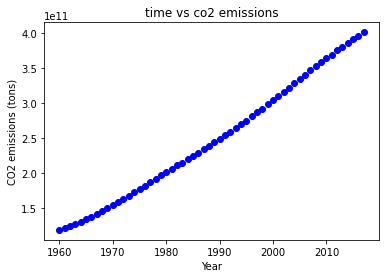

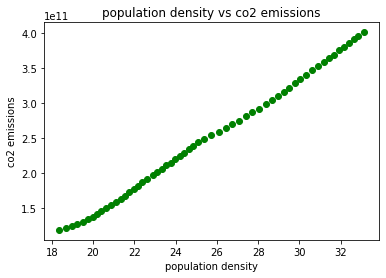

In [395]:
#exploratory plotting
fig1=plt.figure()
plt.plot(df_combo['Year'],df_combo['CO2 emission (Tons)'],'bo')
plt.xlabel('Year')
plt.ylabel('CO2 emissions (tons)')
plt.title('time vs co2 emissions')

plt.savefig('timevsco2')

fig2=plt.figure()
plt.plot(df_combo['population density'],df_combo['CO2 emission (Tons)'],'go')
plt.xlabel('population density')
plt.ylabel('co2 emissions')
plt.title('population density vs co2 emissions')

plt.savefig('popdensvsco2')

In [396]:
y = df_combo['CO2 emission (Tons)']

x = df_combo['Year'].to_numpy()
x = x.reshape(-1,1)


In [397]:
#linear regression
#Split data between training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

#Create linear model
lm=LinearRegression()

#Fit linear model
lm.fit(x_train,y_train)

LinearRegression()

In [398]:
#Use model to predict 
y_train_predicted=lm.predict(x_train)

#Compute r squared from training dataset
r2_train = r2_score(y_train,y_train_predicted)

#Compute adjusted rsquared from training dataset
n = x_train.shape[0]
p = x_train.shape[1]

r2_train_adj = 1-(((1-r2_train)*(n-1))/(n-p-1))

print('R^2 = ',r2_train)
print('R^2 adjusted =', r2_train_adj)

R^2 =  0.9943810771375085
R^2 adjusted = 0.9942332107463903


In [399]:
#Predict y values from testing dataset
y_test_predicted = lm.predict(x_test)

#Compute r squared from testing dataset
r2_test = r2_score(y_test,y_test_predicted)

#Compute adjusted rsquared from testing dataset
n = x_test.shape[0]
p = x_test.shape[1]

r2_test_adj = 1-(((1-r2_test)*(n-1))/(n-p-1))

print('R^2 = ',r2_test)
print('R^2 adjusted =', r2_test_adj)

print(lm.coef_)
print(lm.intercept_)

R^2 =  0.99483725184977
R^2 adjusted = 0.9945145800903806
[4.98905925e+09]
-9672819487471.08


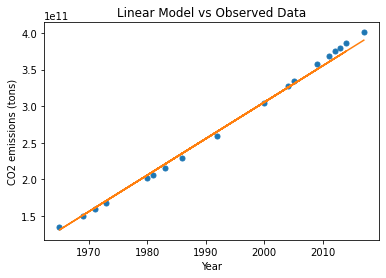

In [400]:
#plot model vs observed data
fig5=plt.figure()

b1 = lm.coef_
b0 = lm.intercept_

p1 = plt.plot(x_test,y_test,ls='',marker='o', markersize = '5')
p2 = plt.plot(x_test,y_test_predicted,ls='-',marker='')
plt.xlabel('Year')
plt.ylabel('CO2 emissions (tons)')
plt.title('Linear Model vs Observed Data')

plt.savefig('linmodtime')

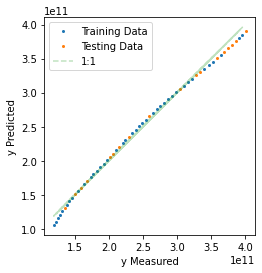

In [401]:
#Plot results 
fig3=plt.figure()

p1 = plt.plot(y_train,y_train_predicted,ls='',marker='o', markersize = '2')
p1 = plt.plot(y_test,y_test_predicted,ls='',marker='o', markersize = '2')
p3 = plt.plot(y_train, y_train,ls='--',alpha=.3)
plt.xlabel('actual co2 emissions')
plt.ylabel('predicted CO2 emissions')

ax=plt.gca()
ax.set_aspect('equal')
ax.legend(['Training Data','Testing Data','1:1'])
plt.ylabel('y Predicted')
plt.xlabel('y Measured')

plt.savefig('yvytime')

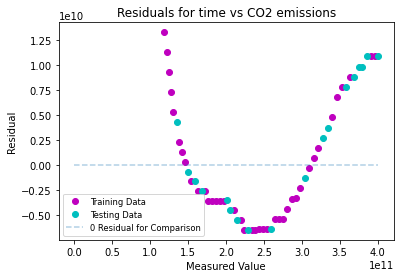

In [402]:
#residuals
residual_train=y_train-y_train_predicted
residual_test=y_test-y_test_predicted

end = df_combo.loc[0,'CO2 emission (Tons)']

fig4 = plt.figure()
p1=plt.plot(y_train,residual_train,marker='o',color = 'm',ls='')
p2=plt.plot(y_test,residual_test,marker='o', color = 'c',ls='')
p3=plt.plot(np.array([2,end]),np.array([0,0]),ls='--',alpha=.35)
ax=plt.gca()
ax.legend(['Training Data','Testing Data','0 Residual for Comparison'],loc=3,fontsize='small')
plt.ylabel('Residual')
plt.xlabel('Measured Value')
plt.title('Residuals for time vs CO2 emissions')

plt.savefig('restime')

In [403]:
y = df_combo['CO2 emission (Tons)']

x = df_combo['population density'].to_numpy()
x = x.reshape(-1,1)


In [404]:
#linear regression
#Split data between training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

#Create linear model
lm=LinearRegression()

#Fit linear model
lm.fit(x_train,y_train)

LinearRegression()

In [405]:
#Use model to predict 
y_train_predicted=lm.predict(x_train)

#Compute r squared from training dataset
r2_train = r2_score(y_train,y_train_predicted)

#Compute adjusted rsquared from training dataset
n = x_train.shape[0]
p = x_train.shape[1]

r2_train_adj = 1-(((1-r2_train)*(n-1))/(n-p-1))

print('R^2 = ',r2_train)
print('R^2 adjusted =', r2_train_adj)

R^2 =  0.9981116995406423
R^2 adjusted = 0.9980620074232908


In [406]:
#Predict y values from testing dataset
y_test_predicted = lm.predict(x_test)

#Compute r squared from testing dataset
r2_test = r2_score(y_test,y_test_predicted)

#Compute adjusted rsquared from testing dataset
n = x_test.shape[0]
p = x_test.shape[1]

r2_test_adj = 1-(((1-r2_test)*(n-1))/(n-p-1))

print('R^2 = ',r2_test)
print('R^2 adjusted =', r2_test_adj)

print(lm.coef_)
print(lm.intercept_)

R^2 =  0.9986878091149312
R^2 adjusted = 0.9986057971846144
[1.92625372e+10]
-243783824984.3031


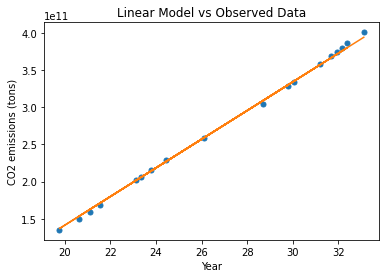

In [407]:
#plot model vs observed data
fig5=plt.figure()

b1 = lm.coef_
b0 = lm.intercept_

p1 = plt.plot(x_test,y_test,ls='',marker='o', markersize = '5')
p2 = plt.plot(x_test,y_test_predicted,ls='-',marker='')
plt.xlabel('Year')
plt.ylabel('CO2 emissions (tons)')
plt.title('Linear Model vs Observed Data')

plt.savefig('linmodpop')

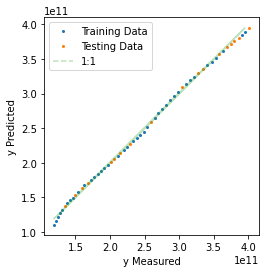

In [408]:
#Plot results 
fig3=plt.figure()

p1 = plt.plot(y_train,y_train_predicted,ls='',marker='o', markersize = '2')
p1 = plt.plot(y_test,y_test_predicted,ls='',marker='o', markersize = '2')
p3 = plt.plot(y_train, y_train,ls='--',alpha=.3)
plt.xlabel('actual co2 emissions')
plt.ylabel('predicted CO2 emissions')

ax=plt.gca()
ax.set_aspect('equal')
ax.legend(['Training Data','Testing Data','1:1'])
plt.ylabel('y Predicted')
plt.xlabel('y Measured')

plt.savefig('yvypop')

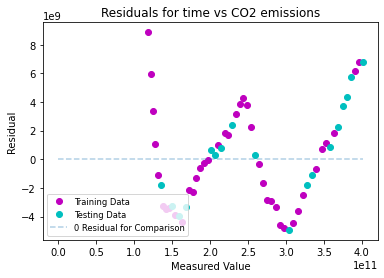

In [409]:
#residuals
residual_train=y_train-y_train_predicted
residual_test=y_test-y_test_predicted

end = df_combo.loc[0,'CO2 emission (Tons)']

fig4 = plt.figure()
p1=plt.plot(y_train,residual_train,marker='o',color = 'm',ls='')
p2=plt.plot(y_test,residual_test,marker='o', color = 'c',ls='')
p3=plt.plot(np.array([2,end]),np.array([0,0]),ls='--',alpha=.35)
ax=plt.gca()
ax.legend(['Training Data','Testing Data','0 Residual for Comparison'],loc=3,fontsize='small')
plt.ylabel('Residual')
plt.xlabel('Measured Value')
plt.title('Residuals for time vs CO2 emissions')

plt.savefig('respop')

Now, adding population density to model

In [410]:
#obtaining variables
y2 = df_combo['CO2 emission (Tons)']

x2 = df_combo.loc[:,['Year','population density']]

In [411]:
#linear regression
#Split data between training and testing sets

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3,random_state=42)

#Create linear model
lm=LinearRegression()

#Fit linear model
lm.fit(x2_train,y2_train)


LinearRegression()

In [412]:
#Use model to predict 
y2_train_predicted=lm.predict(x2_train)

#Compute r squared from training dataset
r2_train = r2_score(y2_train,y2_train_predicted)

#Compute adjusted rsquared from training dataset
n = x2_train.shape[0]
p = x2_train.shape[1]

r2_train_adj = 1-(((1-r2_train)*(n-1))/(n-p-1))

print('R^2 = ',r2_train)
print('R^2 adjusted =', r2_train_adj)

R^2 =  0.9981719426892756
R^2 adjusted = 0.9980731287805877


In [413]:
#Predict y values from testing dataset
y2_test_predicted = lm.predict(x2_test)

#Compute r squared from testing dataset
r2_test = r2_score(y2_test,y2_test_predicted)

#Compute adjusted rsquared from testing dataset
n = x2_test.shape[0]
p = x2_test.shape[1]

r2_test_adj = 1-(((1-r2_test)*(n-1))/(n-p-1))

print('R^2 = ',r2_test)
print('R^2 adjusted =', r2_test_adj)

print(lm.coef_)
print(lm.intercept_)

R^2 =  0.9986273623984644
R^2 adjusted = 0.998444344051593
[5.59720566e+08 1.71107208e+10]
-1301853932864.0776


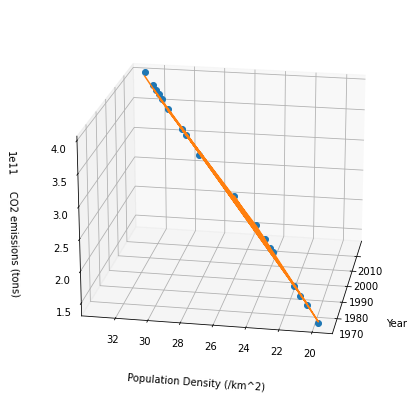

<Figure size 432x288 with 0 Axes>

In [414]:
#model vs observed (in 3D!)

x1 = x2_test['Year']
x2 = x2_test['population density']

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax1 = ax.plot3D(x1,x2, y2_test,ls ='',marker = 'o')
ax2 = ax.plot3D(x1, x2, y2_test_predicted)
ax.set_xlabel('Year', labelpad=20)
ax.set_ylabel('Population Density (/km^2)', labelpad=20)
ax.set_zlabel('CO2 emissions (tons)', labelpad=20)
ax.view_init(20, -170)
    
# show plot
plt.show()

plt.savefig('timepoplinmod')

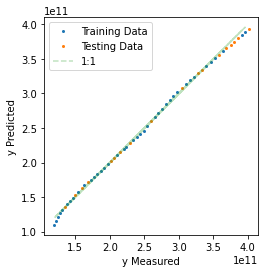

In [415]:
#Plot results 
fig6=plt.figure()

p1 = plt.plot(y2_train,y2_train_predicted,ls='',marker='o', markersize = '2')
p1 = plt.plot(y2_test,y2_test_predicted,ls='',marker='o', markersize = '2')
p3 = plt.plot(y2_train, y2_train,ls='--',alpha=.3)
plt.xlabel('actual co2 emissions')
plt.ylabel('predicted CO2 emissions')

ax=plt.gca()
ax.set_aspect('equal')
ax.legend(['Training Data','Testing Data','1:1'])
plt.ylabel('y Predicted')
plt.xlabel('y Measured')

plt.savefig('yvytimepop')

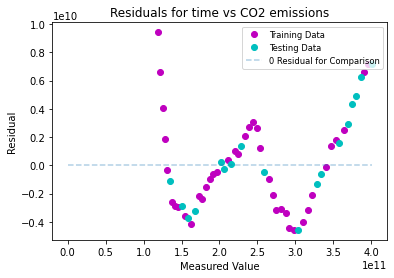

In [416]:
#residuals
residual_train2=y2_train-y2_train_predicted
residual_test2=y2_test-y2_test_predicted

end = df_combo.loc[0,'CO2 emission (Tons)']

fig4 = plt.figure()
p1=plt.plot(y2_train,residual_train2,marker='o',color = 'm',ls='')
p2=plt.plot(y2_test,residual_test2,marker='o', color = 'c',ls='')
p3=plt.plot(np.array([2,end]),np.array([0,0]),ls='--',alpha=.35)
ax=plt.gca()
ax.legend(['Training Data','Testing Data','0 Residual for Comparison'],loc=1,fontsize='small')
plt.ylabel('Residual')
plt.xlabel('Measured Value')
plt.title('Residuals for time vs CO2 emissions')

plt.savefig('restimepop')